# Planetary Orbits

In [7]:
from vpython import *


<0.199445, -0.936849, -0.0209884>


## Newton's Cannonball Thought Experiment

In [2]:
scene = canvas()
earth1 = sphere(pos= vector(0,0,0),radius = 6.3781e6,texture=textures.earth)
earth1.mass = 5.97219e24
grav_const = 6.674e-11
cannon_stand = cylinder(pos = vector(0,6.3781e6,0),radius =100000, axis = vector(0,1000000,0),color = color.blue)
cannonball = sphere(pos= vector(0,7378100,0), radius = 300000, color =color.red, make_trail = True, trail_color = color.white,trail_radius = 50000 )
cannonball.velocity = vector(7340,0,0)
cannonball.mass = 1
deltat = 1
t = 0
while t < 12000:
    rate(1000)
    r_vec = earth1.pos - cannonball.pos
    r_mag = mag(r_vec)
    force = (grav_const * earth1.mass * cannonball.mass)/(r_mag ** 2)
    cannonball.accel = (r_vec/r_mag) * force
    
    cannonball.velocity = cannonball.velocity + cannonball.accel*deltat
    
    cannonball.pos = cannonball.pos + cannonball.velocity*deltat
    t = t + deltat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Newton's Cannon Summary
source: https://applets.kcvs.ca/NewtonsCannon/NewtonsCannon.html
source: https://en.wikipedia.org/wiki/Earth_radius
source: https://en.wikipedia.org/wiki/Earth_mass

For this simulation I used another simulation to validate the escape velocity and orbital velocities. I matched the height of the cannon with the simulation as well as the cannonball's mass. From the simulation I was able to verify that aproxmately 7350 m/s was the necessary velocity to put the ball into orbit. I was able to estimate the escape velocity of to be approimately 11200 m/s. Both of which I was able to verify with the simulation. In designing this I initialized all of the objects first. Then I calculated the vector between the earth and the ball, then the magnitude and forces. I got the acceleration, velocity, and finally moved the ball.

## Solar System Simulation

### Generate Planets Function

In [3]:
def generate_planets():
    sun = sphere(pos = vector(0,0,0),radius =695700e4, color = color.yellow)
    sun.acc = vector(0,0,0)
    sun.velocity = vector(0,0,0)
    sun.mass = 19885000e23
    mercury = sphere(pos = vector(-30363875.2347075e3,-62285127.7983428e3,-2304823.616874413e3),radius = 2440e6, color = color.purple, make_trail = True,trail_radius = 2440e5 )
    mercury.velocity = vector(33.9791988943263e3,-18.9813050877697e3,-4.66788985007926e3)
    mercury.acc = vector(0,0,0)
    mercury.mass = 3.302e23
    venus = sphere(pos = vector(97601837.3554247e3,46903828.7725461e3,-4987910.46493504e3),radius = 6051.84e6, color = color.green, make_trail = True, trail_radius = 6051e5)
    venus.velocity = vector(-15.2820811127058e3, 31.3982799158338e3, 1.31316035218452e3)
    venus.acc = vector(0,0,0)
    venus.mass = 48.685e23
    earth = sphere(pos = vector(-115790289.803098e3,91576450.0269821e3,-4251.93396821618e3), radius = 6378.137e6,texture=textures.earth,make_trail = True, trail_radius = 6378.137e5)
    earth.velocity = vector(-18.9663163635702e3,-23.4827290076897e3,0.00235507185317729e3)
    earth.acc = vector(0,0,0)
    earth.mass = 59.7219e23
    mars = sphere(pos = vector(-72277153.222941e3,229609634.009993e3,6585115.89183785e3),radius = 3389.92e6, color = color.red, make_trail = True, trail_radius = 3389.92e5)
    mars.velocity = vector(-22.193976778373e3,-5.21653920321219e3,0.435075574833124e3)
    mars.acc = vector(0,0,0)
    mars.mass = 6.4171e23
    planets = {"sun":sun,"mercury":mercury,"venus":venus,"earth":earth,"mars":mars}
    return planets

### Calculate Forces Function

In [4]:
def calculate_forces(planets_dictionary):
    for planet in planets_dictionary.values():
        planet.acc = vector(0,0,0)
        for other_planets in planets_dictionary.values():
            r_vector = other_planets.pos - planet.pos
            r_magnitude = mag(r_vector)
            if r_magnitude != 0:
                forces = (grav_const * planet.mass * other_planets.mass)/(r_magnitude ** 2)
                planet.acc += (r_vector/r_magnitude) * (forces/planet.mass)
        

### Move Planets Function

In [5]:
def move_planets(delta_time,planets_dictionary):
    for planet in planets_dictionary.values():
        if planet.pos != vector(0,0,0):
            planet.velocity = planet.velocity + planet.acc*delta_time
            planet.pos = planet.pos + planet.velocity*delta_time
    

### Simulation: Timestep = 12 hours

In [7]:
scene1 = canvas()
planet_dictionary = generate_planets()
deltatime = 43200
t = 0
while t < 31536000*2:
    rate(100)
    calculate_forces(planet_dictionary)
    move_planets(deltatime,planet_dictionary)
    t = t + deltatime
for planet in planet_dictionary.values():
    print(planet.pos)


<IPython.core.display.Javascript object>

<0, 0, 0>
<4.90765e+10, -3.14687e+10, -7.07308e+09>
<-4.91959e+10, 9.45493e+10, 4.13788e+09>
<-1.14377e+11, 9.33135e+10, -4.50634e+06>
<-1.48954e+11, 1.95493e+11, 7.75091e+09>


### Simulation Vs. Actual
Planet	x- pos simulated	2-yr x-position	x error	y-pos simulated	2-yr y-position	y error	z-pos simulated	2-yr z-position	z error
Mercury	4.91E+10	4.94E+10	0.751112712	-3.15E+10	-3.31E+10	4.9751007	-7.07E+09	-7.24E+09	2.328971711
Venus	-4.92E+10	-4.92E+10	0.09355325	9.45E+10	9.55E+10	0.96470386	4.14E+09	4.15E+09	0.350696379
Earth	-1.14E+11	-1.17E+11	1.902797801	9.33E+10	9.06E+10	3.022757535	-4.51E+06	-4.82E+06	6.453449285
Mars	-1.49E+11	-1.50E+11	0.726174998	1.95E+11	1.95E+11	0.266126639	7.75E+09	7.77E+09	0.186198346
		Mean Error(%)	0.86840969		Mean Error(%)	2.307172184		Mean Error(%)	2.32982893
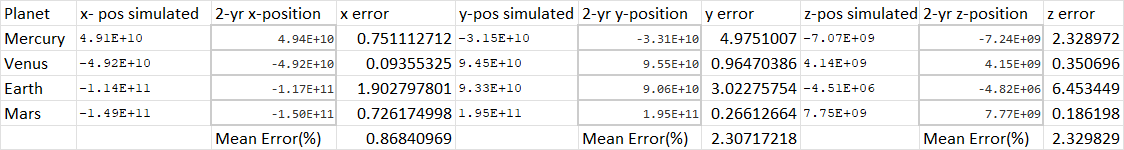

### Simulation: Timestep = 6 hours

In [8]:
scene1 = canvas()
planet_dictionary = generate_planets()
deltatime = 43200/2
t = 0
while t < 31536000*2:
    rate(100)
    calculate_forces(planet_dictionary)
    move_planets(deltatime,planet_dictionary)
    t = t + deltatime
for planet in planet_dictionary.values():
    print(planet.pos)


<IPython.core.display.Javascript object>

<0, 0, 0>
<4.87001e+10, -3.3781e+10, -7.22752e+09>
<-4.90005e+10, 9.5061e+10, 4.13363e+09>
<-1.14338e+11, 9.33536e+10, -4.5048e+06>
<-1.48759e+11, 1.9574e+11, 7.75128e+09>


### Simulation Vs. Actual
Planet	x- pos simulated	2-yr x-position	x error	y-pos simulated	2-yr y-position	y error	z-pos simulated	2-yr z-position	z error
Mercury	4.87E+10	4.94E+10	1.512317794	-3.38E+10	-3.31E+10	2.007268278	-7.23E+09	-7.24E+09	0.196334499
Venus	-4.90E+10	-4.92E+10	0.490369238	9.51E+10	9.55E+10	0.428725688	4.13E+09	4.15E+09	0.45304578
Earth	-1.14E+11	-1.17E+11	1.936246754	9.34E+10	9.06E+10	3.067029935	-4.50E+06	-4.82E+06	6.485417954
Mars	-1.49E+11	-1.50E+11	0.856137241	1.96E+11	1.95E+11	0.392810118	7.75E+09	7.77E+09	0.181433602
		Mean Error(%)	1.198767757		Mean Error(%)	1.473958505		Mean Error(%)	1.829057959
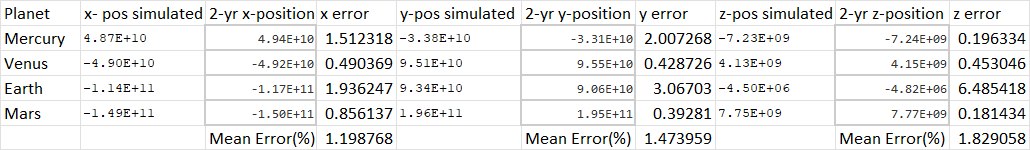

### Simulation: Timestep = 1 hour

In [11]:
scene1 = canvas()
planet_dictionary = generate_planets()
deltatime = 43200/12
t = 0
while t < 31536000*2:
    rate(100)
    calculate_forces(planet_dictionary)
    move_planets(deltatime,planet_dictionary)
    t = t + deltatime
for planet in planet_dictionary.values():
    print(planet.pos)


<IPython.core.display.Javascript object>

<0, 0, 0>
<4.8006e+10, -3.61985e+10, -7.36141e+09>
<-4.87417e+10, 9.55402e+10, 4.12527e+09>
<-1.14279e+11, 9.34172e+10, -4.50702e+06>
<-1.4859e+11, 1.95948e+11, 7.75152e+09>


### Simulation Vs. Actual
Planet	x- pos simulated	2-yr x-position	x error	y-pos simulated	2-yr y-position	y error	z-pos simulated	2-yr z-position	z error
Mercury	4.80E+10	4.94E+10	2.916017175	-3.62E+10	-3.31E+10	9.307305905	-7.36E+09	-7.24E+09	1.652531056
Venus	-4.87E+10	-4.92E+10	1.01593719	9.55E+10	9.55E+10	0.073210487	4.13E+09	4.15E+09	0.654373073
Earth	-1.14E+11	-1.17E+11	1.986849016	9.34E+10	9.06E+10	3.137247507	-4.51E+06	-4.82E+06	6.43933325
Mars	-1.49E+11	-1.50E+11	0.968771185	1.95E+11	1.95E+11	0.266126639	7.75E+09	7.77E+09	0.178342957
		Mean Error(%)	1.721893641		Mean Error(%)	3.195972634		Mean Error(%)	2.231145084
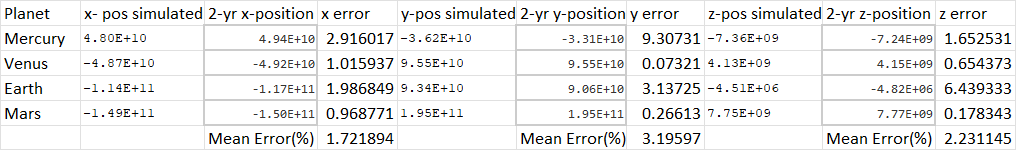


### Determining Initial Values

source:https://ssd.jpl.nasa.gov/horizons/app.html#/

All of my initial values were derived from the Horizons System website to be as accurate as possible. The only changes made to the initial values were to the radii of the planets. To make them visible I increased the radii of the sun by x100 and all other planets by x1000. In the Function generate_planets(), all planets are given the initial starting positions, velocities, mass, and radii. All planets are initialized with an acceleration vector as well.

### Simulation Design

For my simulation design I created three different functions and then run them in a separate cell with a while loop to run the simulation. The first function is the generate_planets() function. When the function is called it initializes all of the planets as well as the sun as sphere() objects with the necessary values. Once the all of the objects are initialized I placed them into a dictionary and return the dictionary object out of the function. The second function is the calculate_forces() function. This function passes in the dictionary object returned from the generate_planets() function and calculates the forces of each planet against the other. It itarates over each planet in the dictionary, then calculates the forces and acceleration against every other planet. The final function is the move_planets() function. This function passes in the planets dictionary as well as the delta time. It then itarates over the planets and updates the velocity and position of the planets. For each simulation I create a new canvas, then generate the planets. I set a delta time and set time to 0. I run a while loop that will call the calculate_forces() and move_planets() functions, then update the time as long as t is under the alloted amount. 

### Verification

Under each simulation you will see an image of the simulated versus expected values. I got all of the expected values from the Horizons System website. I set the date to two years after the initial date, this way I would have a long enough simulation to get a relatively accurate simulation. For the simulation with the 12 hour time step the mean errors are as follows: x-position = 0.87%, y-position = 2.31%, z-position = 2.33%. For the simulation with the 6 hour time step the mean errors are as follows: x-position = 1.20%, y-position = 1.47%, z-position = 1.83%. For the simulation with the 1 hour time step the mean errors are as follows: x-position = 1.72%, y-position = 3.20%, z-position = 2.23%. My results here are a little varied, the most accurate simulation was the 6 hour time step. I do believe that my simulation is accurate within an acceptable range of error give that I am missing the outer planets which should effect the inner planets positions. I also believe the lack of accounting for the moon of earth caused that planete to be the least accurate of my calculations.